## Model Training

In [13]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox

# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_absolute_error, mean_squared_error, r2_score


# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [14]:
df = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\GitHub\Online-Food-Order-Prediction\notebook\food_order.csv')

#### Show Top 5 Records

In [15]:
df.head()

,Age,Monthly Income,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Occupation_House wife,Occupation_Self Employeed,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Output
0,-1.333333,-0.200004,0.5,-0.006653,0.109714,-0.567686,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.000000,0.000000,0.0,0.000000,-0.225524,-0.427948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,-0.666667,0.000000,0.0,-0.364241,1.024000,-0.288210,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,-0.666667,-0.200004,1.5,-0.493971,-0.464762,-0.253275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.666667,0.000000,0.5,0.133056,-0.591238,-0.410480,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


#### Preparing X and Y variables

In [16]:
X = df.drop(columns=['Output'],axis=1)

In [17]:
X.head()

,Age,Monthly Income,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Occupation_House wife,Occupation_Self Employeed,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes
0,-1.333333,-0.200004,0.5,-0.006653,0.109714,-0.567686,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.000000,0.0,0.000000,-0.225524,-0.427948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.666667,0.000000,0.0,-0.364241,1.024000,-0.288210,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.666667,-0.200004,1.5,-0.493971,-0.464762,-0.253275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.666667,0.000000,0.5,0.133056,-0.591238,-0.410480,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
y = df['Output']

In [19]:
y.unique()

array([1., 0.])

In [20]:
# X = preprocessor.fit_transform(X)

In [21]:
X.shape

(388, 15)

In [22]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((310, 15), (78, 15))

#### Create an Evaluate Function to give all metrics after model Training

In [23]:
def evaluate_model(true, predicted, average='binary'):
    """
    Evaluate model performance for categorical data.

    Parameters:
    - true: array-like of shape (n_samples,) Ground truth (correct) target values.
    - predicted: array-like of shape (n_samples,) Estimated targets as returned by a classifier.
    - average: string, [None, 'binary' (default), 'micro', 'macro', 'samples', 'weighted']
      This parameter is required for multiclass/multilabel targets. If `None`, the scores for each class are returned.

    Returns:
    - accuracy: float
    - precision: float
    - recall: float
    - f1_score: float
    - conf_matrix: array, shape = [n_classes, n_classes]
    """
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average=average)
    recall = recall_score(true, predicted, average=average)
    f1 = f1_score(true, predicted, average=average)
    conf_matrix = confusion_matrix(true, predicted)
    
    return accuracy, precision, recall, f1, conf_matrix



In [24]:
# Dictionary of classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "SVC": SVC(probability=True),
    "K-Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    # "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False),
    "LightGBM": LGBMClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "MLP": MLPClassifier(max_iter=500)
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='binary')
    recall_train = recall_score(y_train, y_train_pred, average='binary')
    f1_train = f1_score(y_train, y_train_pred, average='binary')
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='binary')
    recall_test = recall_score(y_test, y_test_pred, average='binary')
    f1_test = f1_score(y_test, y_test_pred, average='binary')

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- Precision: {:.4f}".format(precision_train))
    print("- Recall: {:.4f}".format(recall_train))
    print("- F1 Score: {:.4f}".format(f1_train))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- Precision: {:.4f}".format(precision_test))
    print("- Recall: {:.4f}".format(recall_test))
    print("- F1 Score: {:.4f}".format(f1_test))
    accuracy_list.append(accuracy_test)
    precision_list.append(precision_test)
    recall_list.append(recall_test)
    f1_list.append(f1_test)
    
    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set

### Results

In [25]:
# Create a DataFrame to display the performance metrics of each model
performance_df = pd.DataFrame({
    'Model Name': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

# Sort the DataFrame by Accuracy (or any other metric you prefer)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

# Display the performance DataFrame
print("Model Performance Metrics:")
print(performance_df)

Model Performance Metrics:
             Model Name  Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  1.000000   1.000000  1.000000  1.000000
1         Decision Tree  1.000000   1.000000  1.000000  1.000000
2         Random Forest  1.000000   1.000000  1.000000  1.000000
3     Gradient Boosting  1.000000   1.000000  1.000000  1.000000
4              AdaBoost  1.000000   1.000000  1.000000  1.000000
5               Bagging  1.000000   1.000000  1.000000  1.000000
6                   SVC  1.000000   1.000000  1.000000  1.000000
8           Naive Bayes  1.000000   1.000000  1.000000  1.000000
9              CatBoost  1.000000   1.000000  1.000000  1.000000
10             LightGBM  1.000000   1.000000  1.000000  1.000000
12                  MLP  1.000000   1.000000  1.000000  1.000000
7           K-Neighbors  0.974359   0.984848  0.984848  0.984848
11                  LDA  0.858974   0.876712  0.969697  0.920863


## Confusion Matrix and ROC-Curve

Logistic Regression
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000




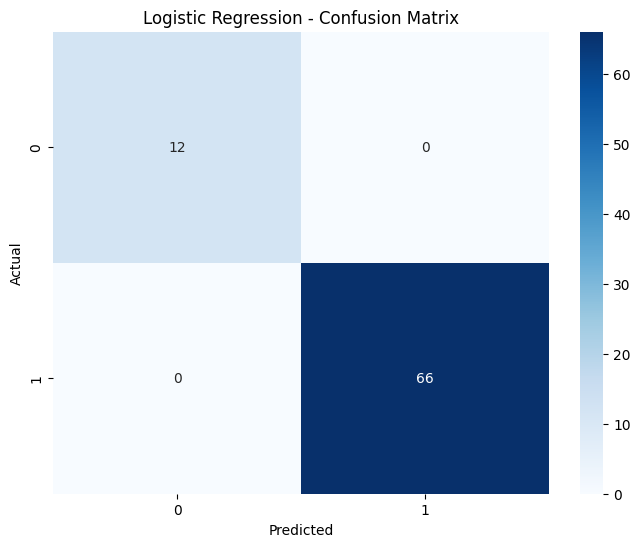

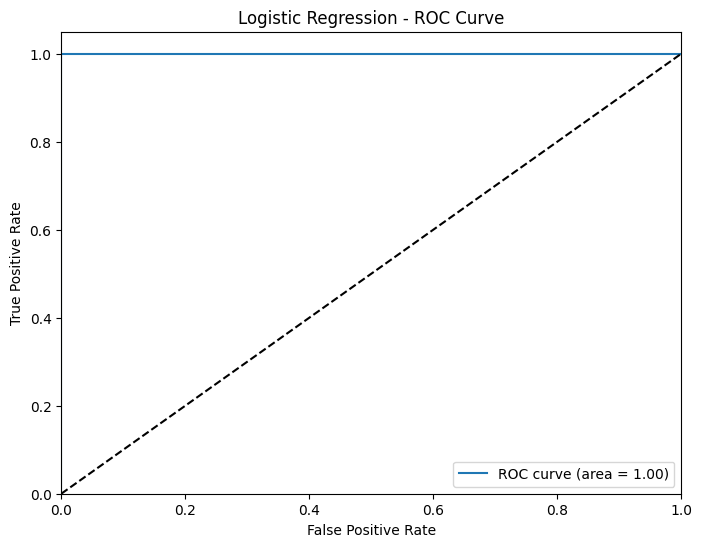

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000




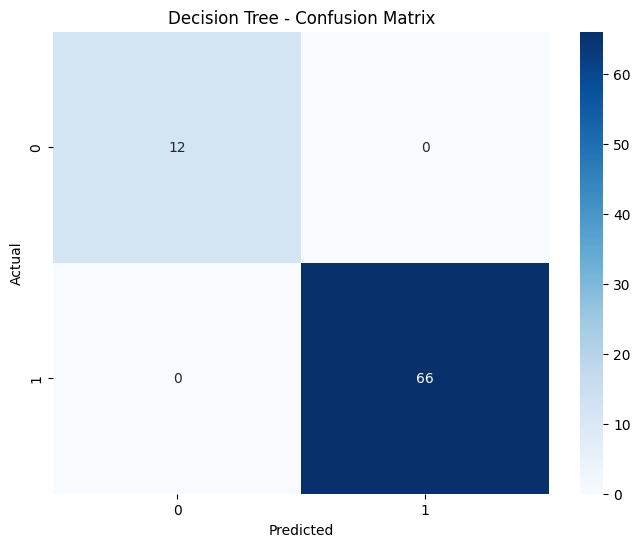

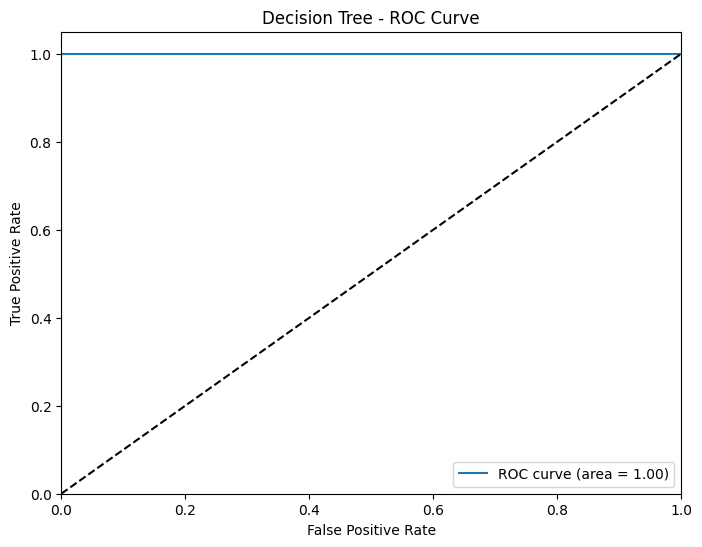

Random Forest
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000




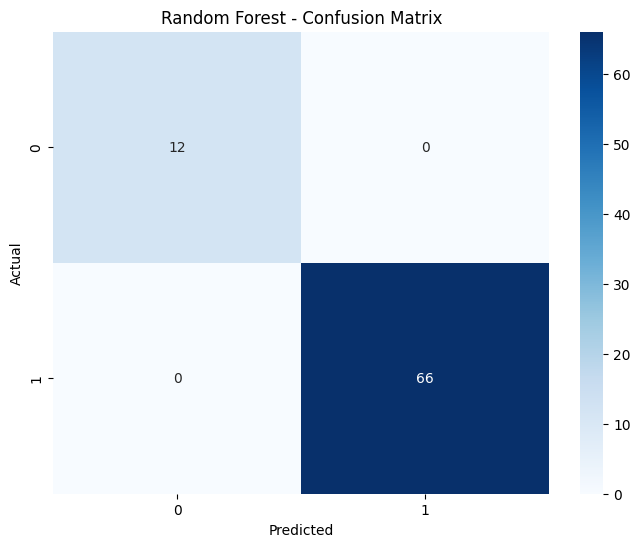

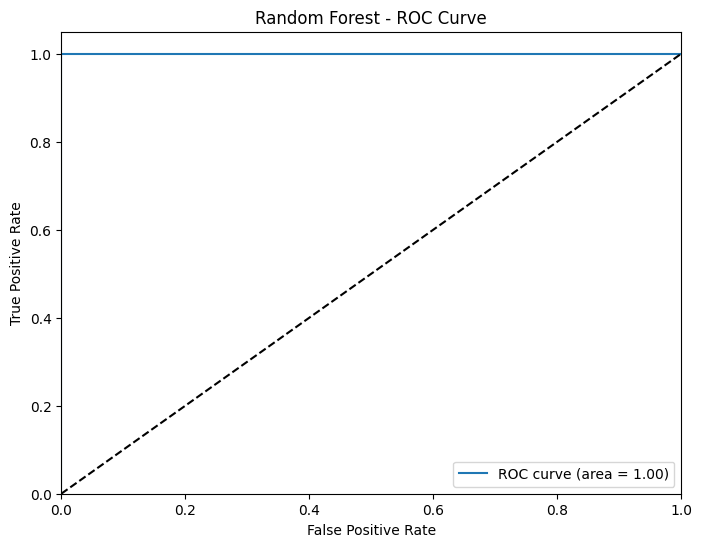

Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000




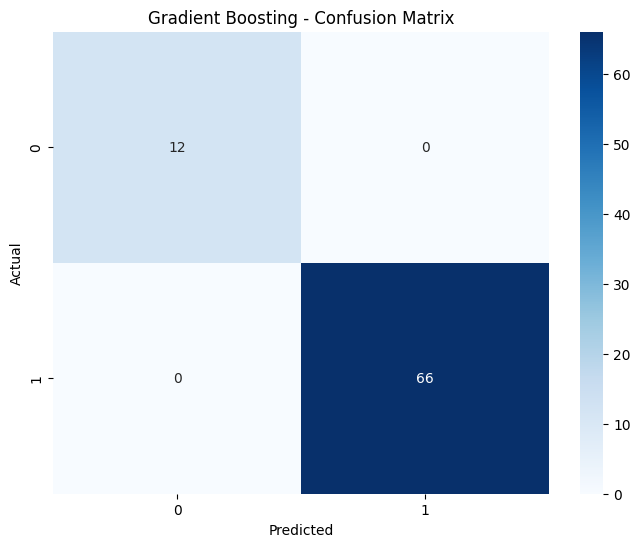

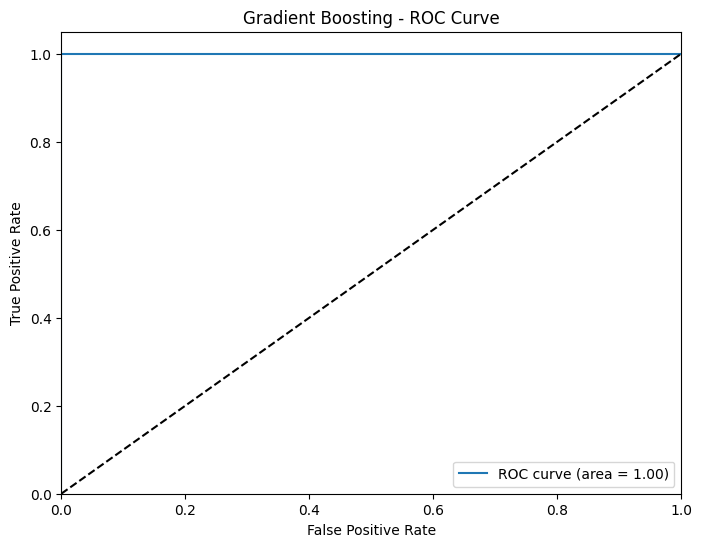

AdaBoost
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000




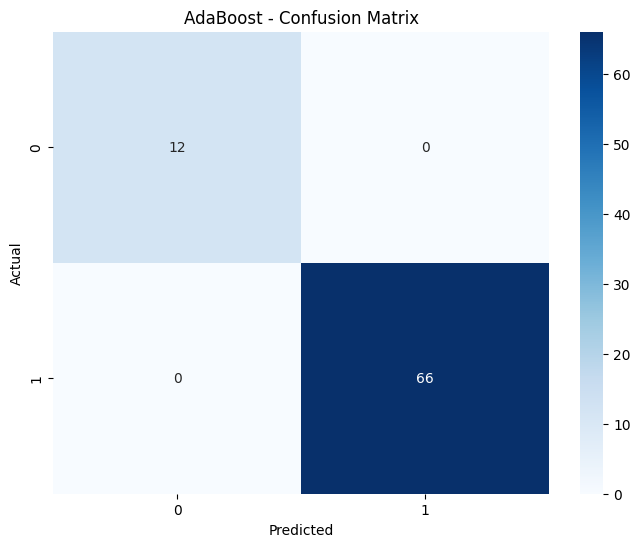

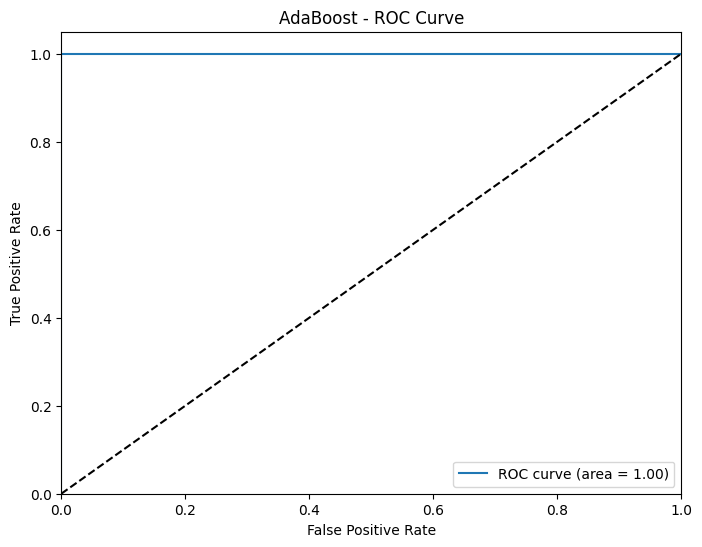

Bagging
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000




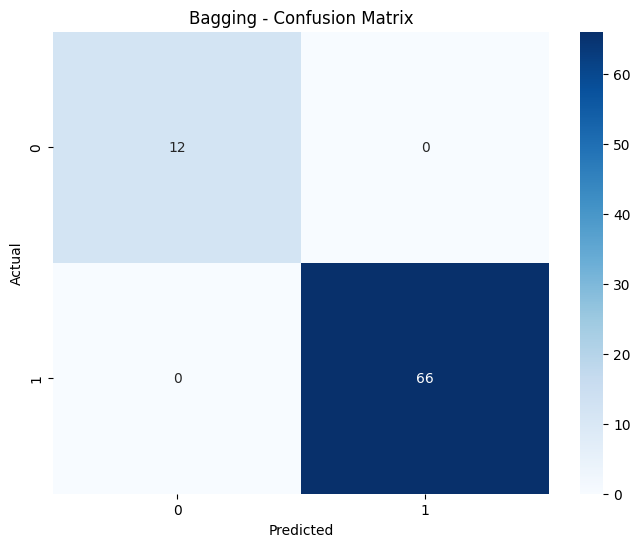

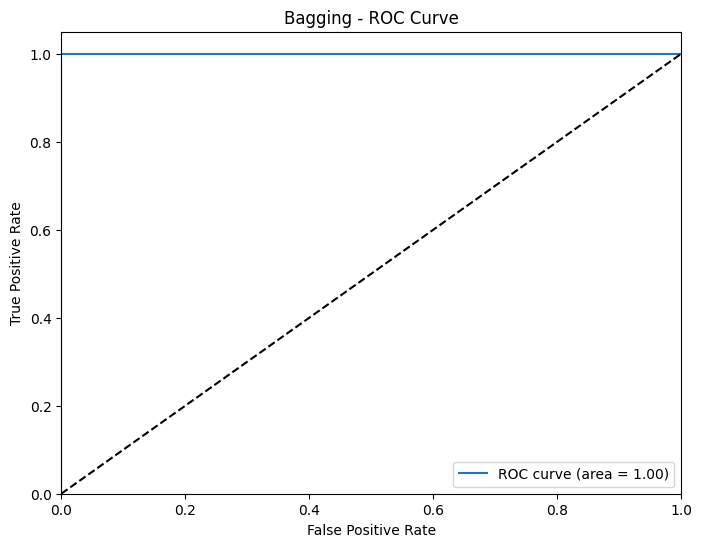

SVC
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000




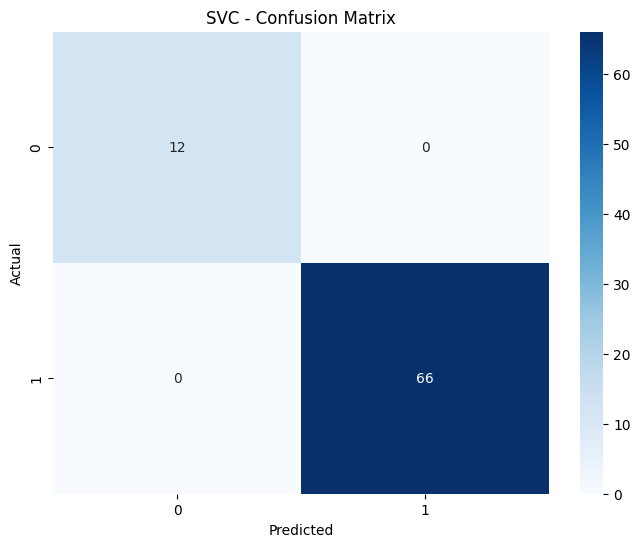

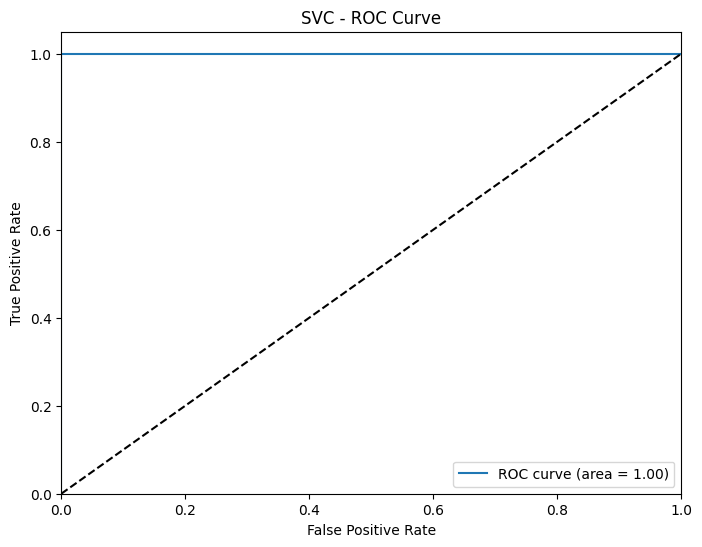

K-Neighbors
Model performance for Training set
- Accuracy: 0.9581
----------------------------------
Model performance for Test set
- Accuracy: 0.9744




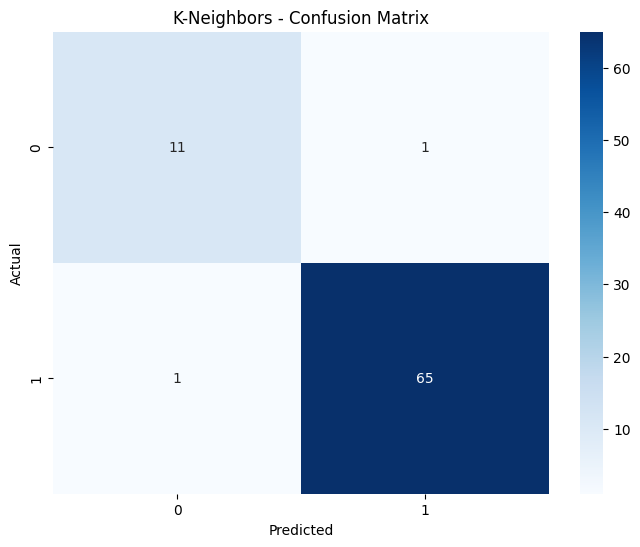

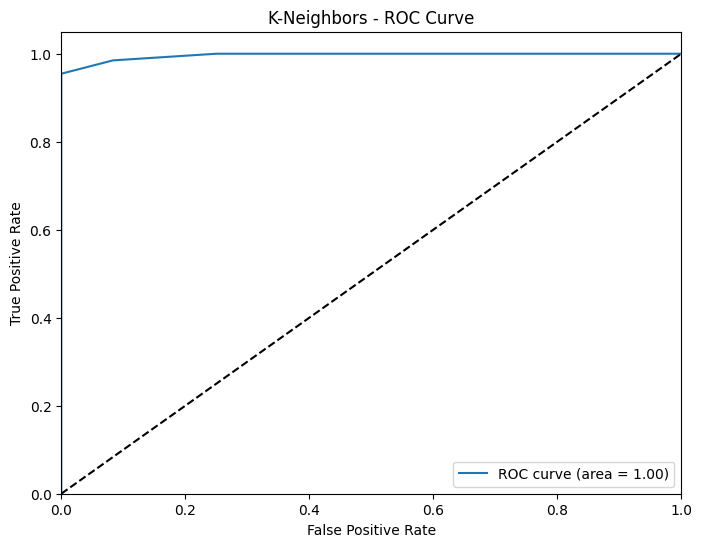

Naive Bayes
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000




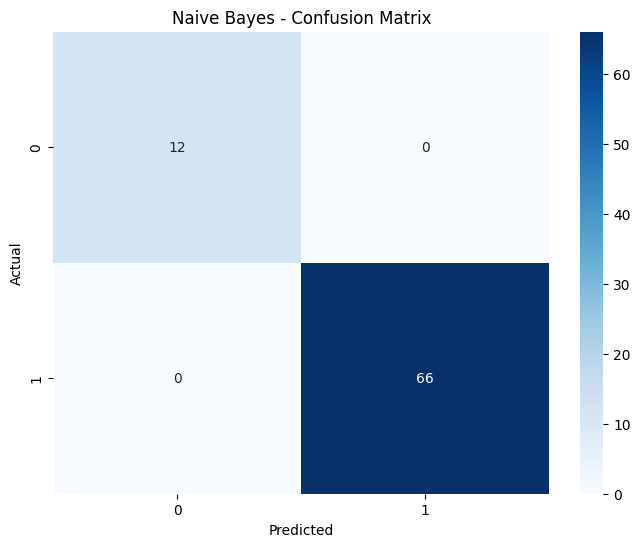

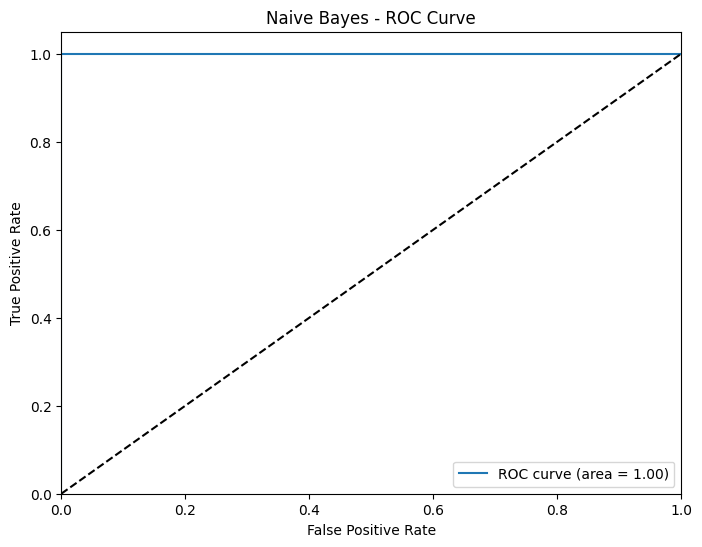

CatBoost
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000




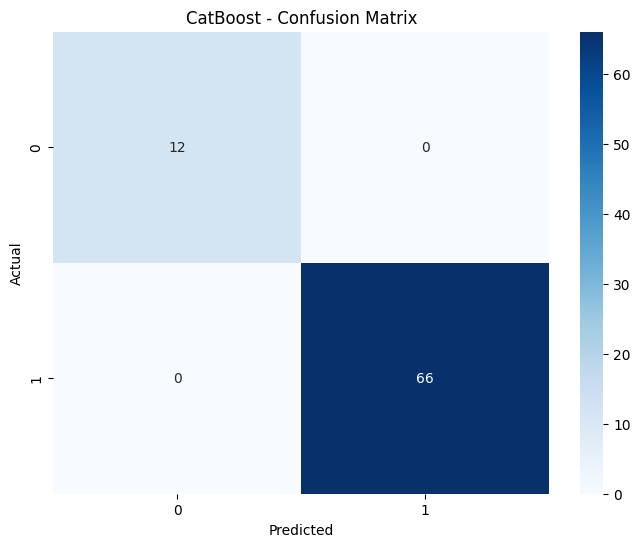

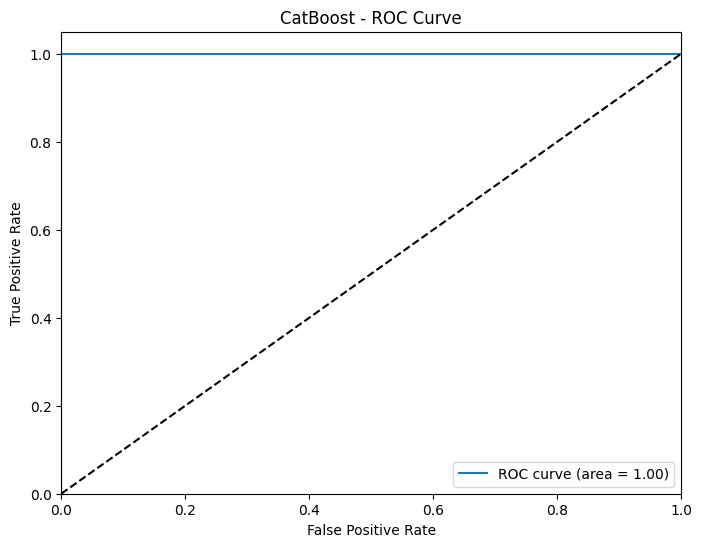

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 235, number of negative: 75
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 310, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.758065 -> initscore=1.142097
[LightGBM] [Info] Start training from score 1.142097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

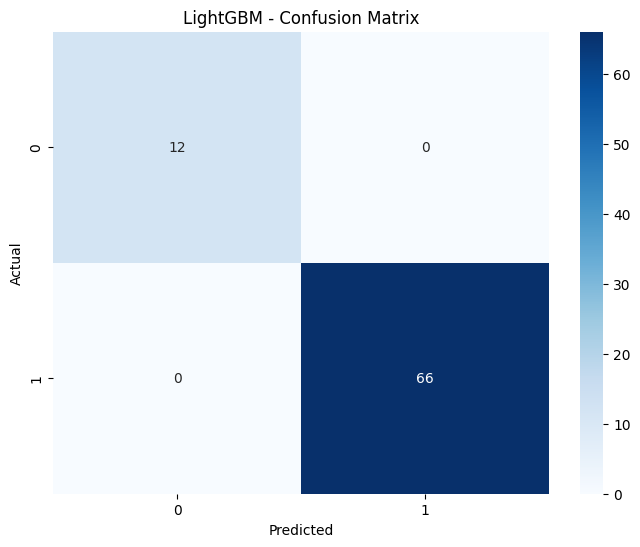

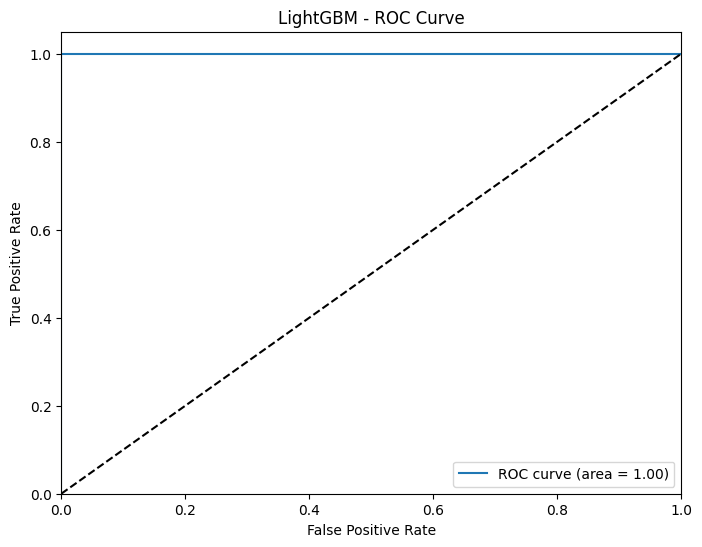

LDA
Model performance for Training set
- Accuracy: 0.7742
----------------------------------
Model performance for Test set
- Accuracy: 0.8590




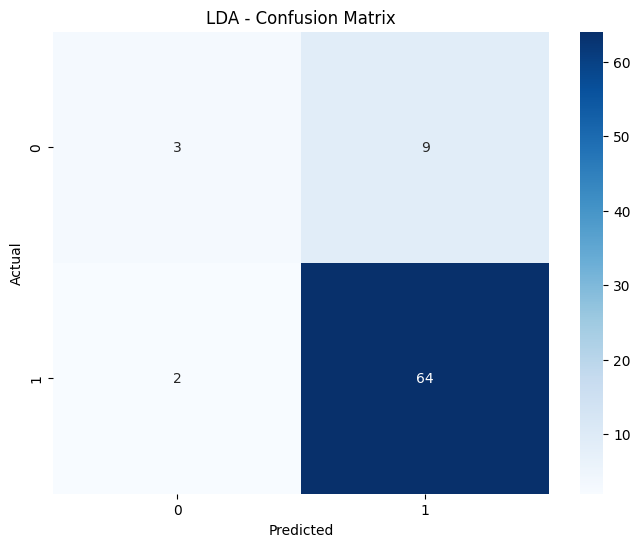

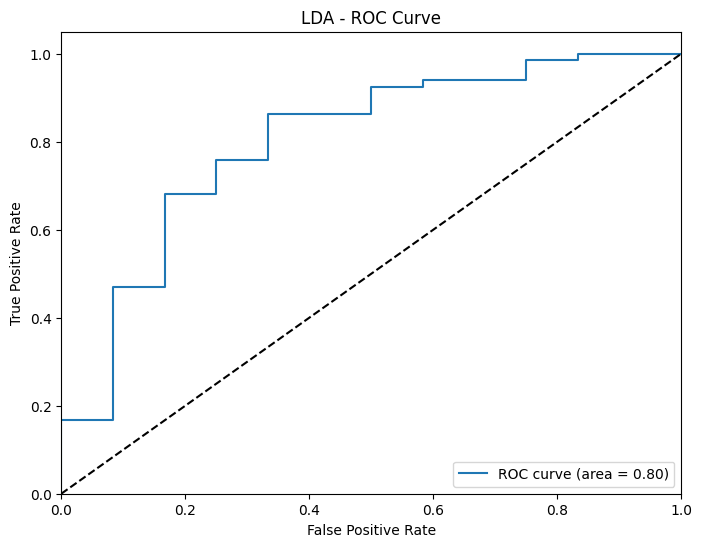

MLP
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000




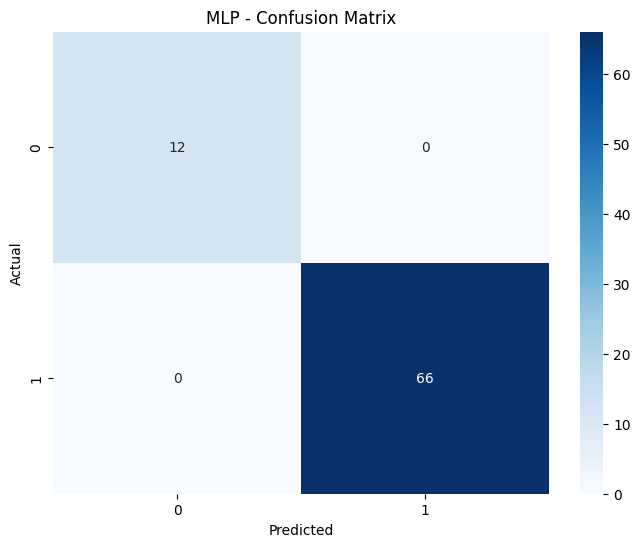

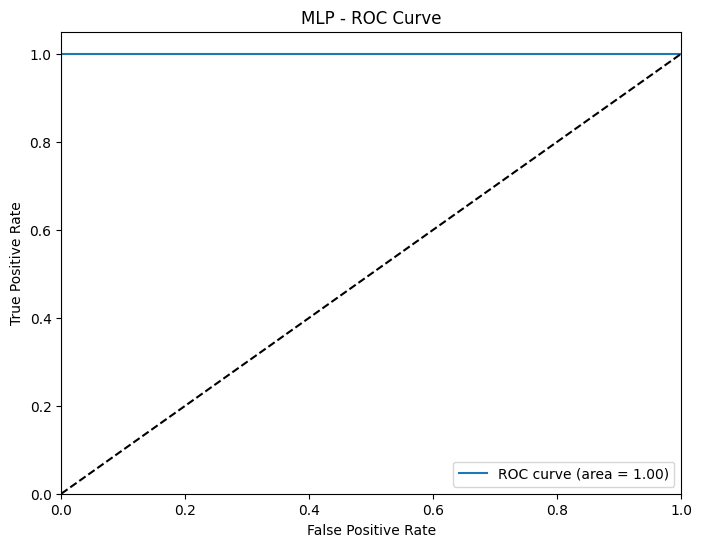

Model Performance Metrics:
             Model Name  Accuracy
0   Logistic Regression  1.000000
1         Decision Tree  1.000000
2         Random Forest  1.000000
3     Gradient Boosting  1.000000
4              AdaBoost  1.000000
5               Bagging  1.000000
6                   SVC  1.000000
8           Naive Bayes  1.000000
9              CatBoost  1.000000
10             LightGBM  1.000000
12                  MLP  1.000000
7           K-Neighbors  0.974359
11                  LDA  0.858974


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Define your classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "SVC": SVC(probability=True),
    "K-Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    # "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False),
    "LightGBM": LGBMClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "MLP": MLPClassifier(max_iter=500)
}

# Initialize lists to store performance metrics
model_list = []
accuracy_list = []

# Loop through each model, train, predict, evaluate, and plot
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(name)
    model_list.append(name)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_accuracy))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(test_accuracy))
    accuracy_list.append(test_accuracy)
    
    print('='*35)
    print('\n')
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()
    
    # Plot ROC curve
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Create a DataFrame to display the performance metrics of each model
performance_df = pd.DataFrame({
    'Model Name': model_list,
    'Accuracy': accuracy_list
})

# Sort the DataFrame by Accuracy
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

# Display the performance DataFrame
print("Model Performance Metrics:")
print(performance_df)
